In [1]:
#please read all the below comments before running this cell
#We have completed the data collection, the files are saved in the '/Data/Real-Data' folder which we will be using for data 
## engineering purposes

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# running on Google Colab? upload the "Real_Combine.csv" file then run below code
#df = pd.read_csv("/content/Real_Combine.csv") 

# Or (Whichever you choose, comment out the other one)

# running on local machine? run below code
df = pd.read_csv("../Data/Real-Data/Real_Combine.csv")
df.head()


,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


Check for null values

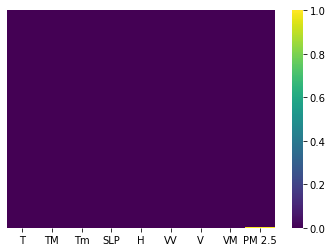

In [2]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=True,cmap='viridis')
#here we see there is no null values

In [3]:
#there were two null values, which I have removed from the dataset. there were 1090 attributes, not there is 1088
df = df.dropna()

In [4]:
df.shape

(1088, 9)

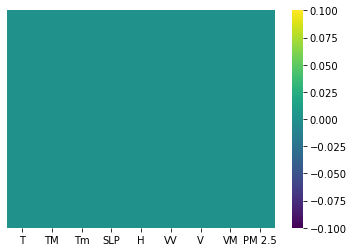

In [5]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=True,cmap='viridis')
#cbar will give you the density indicator if its 'True'
#The indicator is at 0.00, no null values now.

initiating objects with independent and dependent features

In [6]:
X = df.iloc[:, :-1] #independent features
y = df.iloc[:, -1] #dependent features

The sns.pairplot will show you how are the features correlated with other features. 

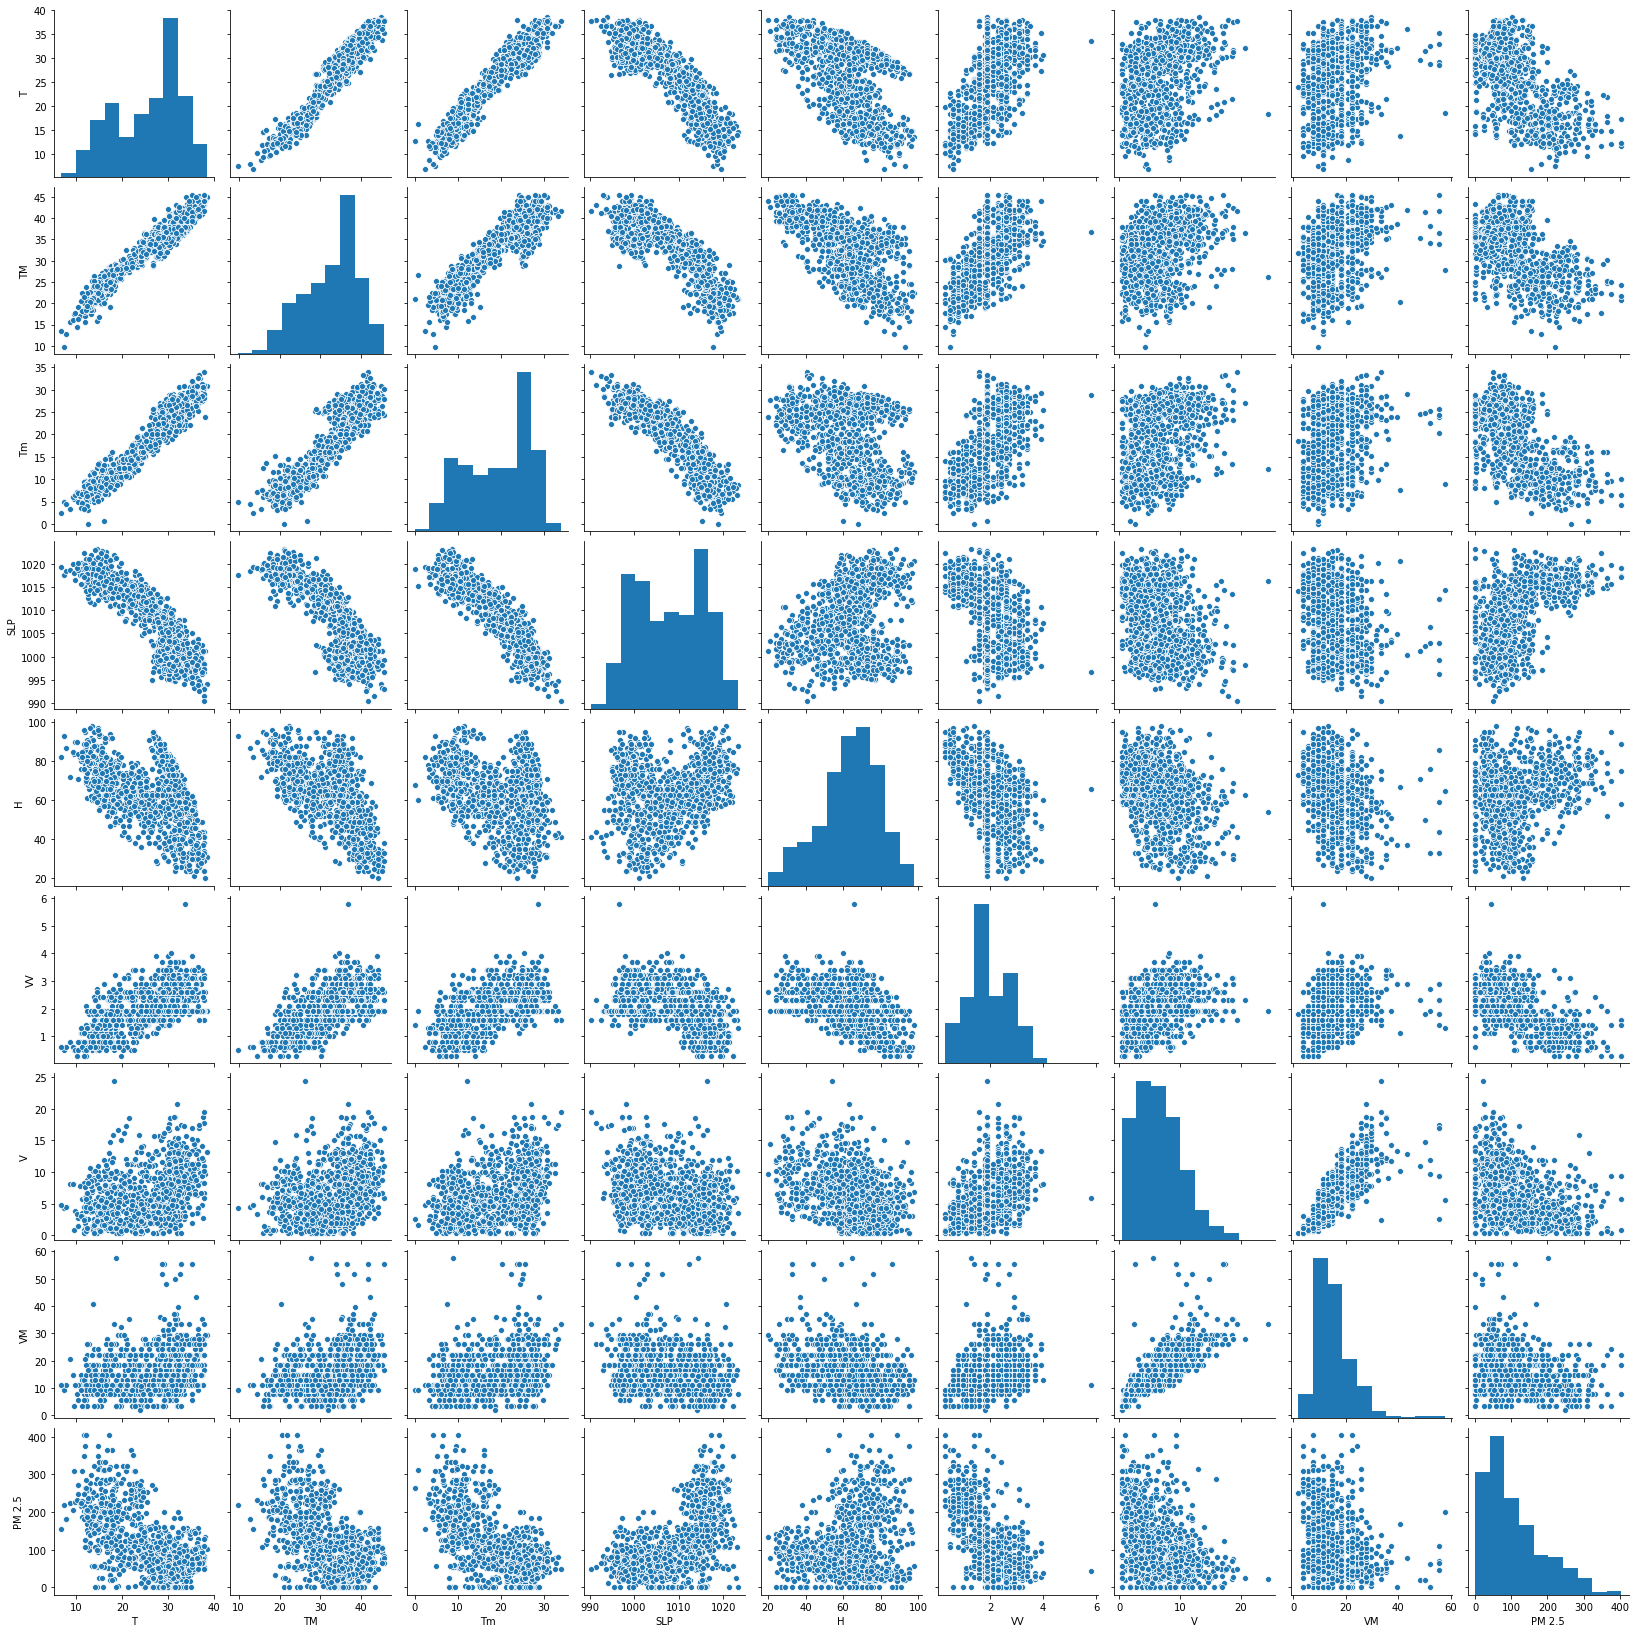

In [7]:
sns.pairplot(df)

In [8]:
df.corr() # this is the same data like the sns.pairplot.

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.963416,0.957227,-0.883207,-0.488919,0.625547,0.320218,0.276548,-0.629693
TM,0.963416,1.000000,0.889979,-0.826008,-0.576799,0.598727,0.303218,0.285671,-0.565459
Tm,0.957227,0.889979,1.000000,-0.912333,-0.275047,0.547490,0.312165,0.244408,-0.661733
SLP,-0.883207,-0.826008,-0.912333,1.000000,0.231971,-0.483494,-0.325862,-0.269129,0.605637
H,-0.488919,-0.576799,-0.275047,0.231971,1.000000,-0.489597,-0.356241,-0.368694,0.166577
VV,0.625547,0.598727,0.547490,-0.483494,-0.489597,1.000000,0.369851,0.325963,-0.593327
V,0.320218,0.303218,0.312165,-0.325862,-0.356241,0.369851,1.000000,0.780952,-0.327917
VM,0.276548,0.285671,0.244408,-0.269129,-0.368694,0.325963,0.780952,1.000000,-0.262848
PM 2.5,-0.629693,-0.565459,-0.661733,0.605637,0.166577,-0.593327,-0.327917,-0.262848,1.000000


Lets use the heatmap with correlation. Correlation states how the dfeatures are related to each other or the target variable
Correlation can be + (increase in one feature, increases the target feature)or - (opp)
Heatmap will help you to find which feature is most related to the target variable. 

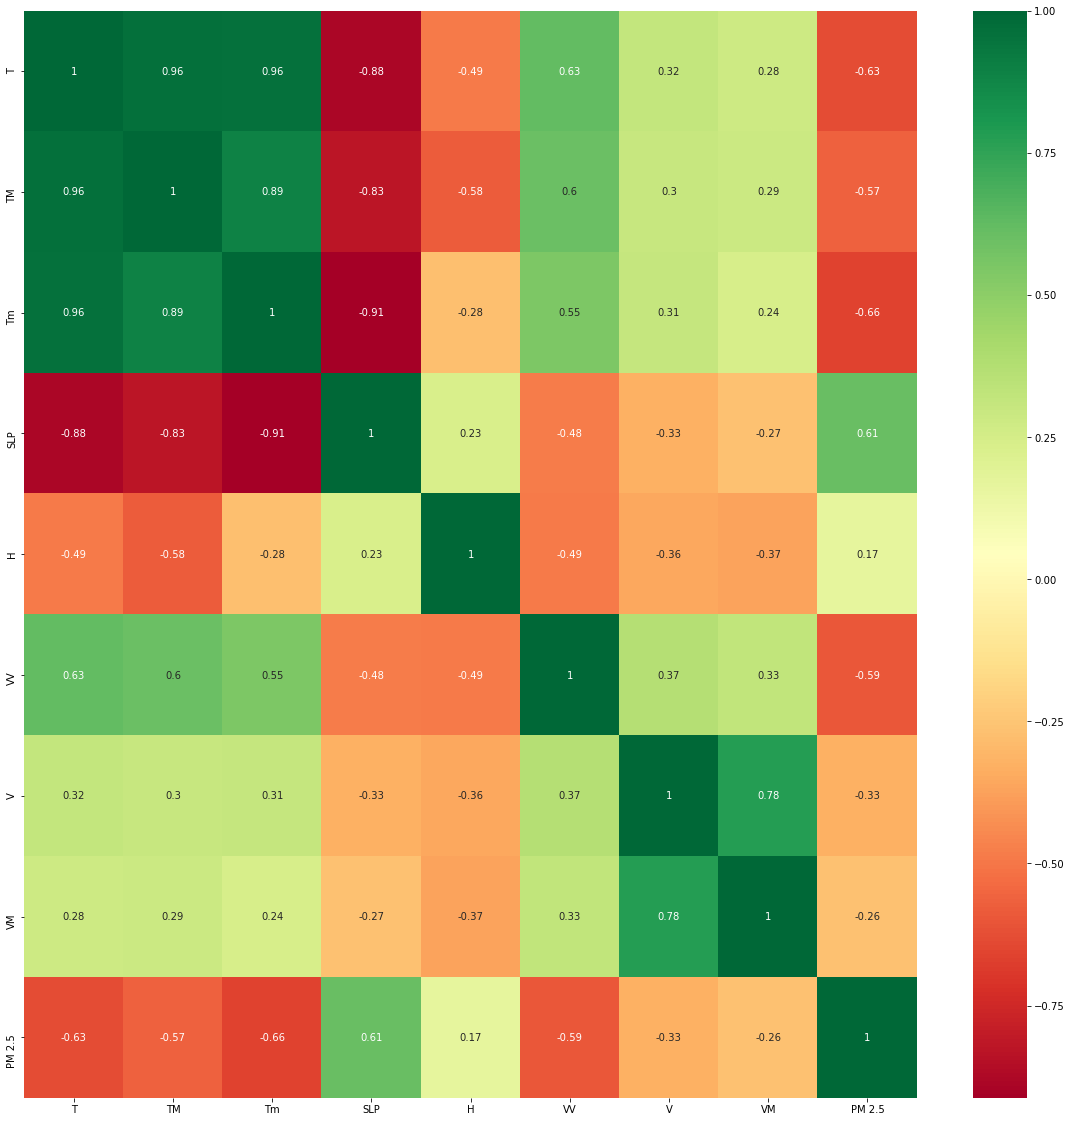

In [9]:
corrmat = df.corr() #Get correlations of each features in a dataset
top_cor_features = corrmat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(df[top_cor_features].corr(),annot=True, cmap="RdYlGn") #plt heat map

Information only:

Feature Importance

I will implement one regressor that will tell me the importance of a feature from the independent features on the target variable.
The extra tree regressor will score each feature on its importance to the target variable 

In [10]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y) # X are independent and y is target

ExtraTreesRegressor()

In [11]:
X.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2


In [12]:
print(model.feature_importances_)

[0.15407895 0.12779214 0.17143024 0.13839454 0.07929308 0.22460981
 0.05969739 0.04470386]


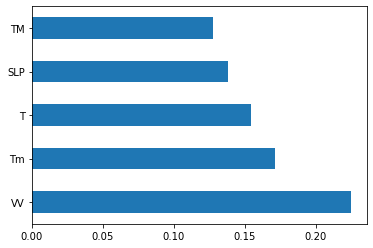

In [13]:
#how does the data look when the above data is plotted
feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest().plot(kind='barh')
plt.show()


Linear Regression

LR aim is to create a best fit line.

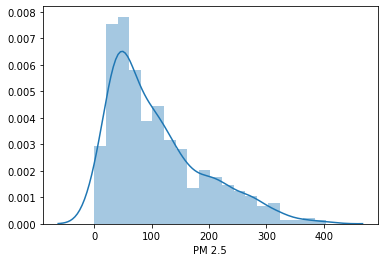

In [14]:
sns.distplot(y) #right skewed

Train Test Split

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0) #70:30

In [16]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

R-squared is a goodness-of-fit measure for linear regression models. ... R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale

Note: The error rate should move towards 1.00. If the error rate is 1, then its a perfect best score. 

In [17]:
print('Coefficient of determination R^2 on train set: {}'.format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 on train set: 0.5558460401426302


In [18]:
print('Coefficient of determination R^2 on train set: {}'.format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 on train set: 0.5002132050072754


The above score is the error rate to the test and train data set. The score is not great, it needs to improved using other models. ex: non linear models.

Cross Val Score - similar to train-test-split but it does its caluclation in many modes.
Lets use this method to find out is there any difference between the above score and scores that we get from
performing accuracy using different portions from the dataset. 


In [19]:
#As it is understood that some part of the data performs better than the rest, so we check this method. 
from sklearn.model_selection import cross_val_score
score = cross_val_score(regressor,X,y, cv=5) #cv = 1088 rows/5 = regressor runs 5 times using different portions of the data. 
score.mean() # there is no much difference than the above train_test_split and cross_val_score


0.4962057187240263

Modal Evaluation:

regressor.coef_ gives you the slope which is y = mx+c
regressor.intercept_  gives you the value when all the independent features are zero

In [20]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns = ['Coefficient'])
coeff_df

,Coefficient
T,0.735866
TM,0.494222
Tm,-5.785464
SLP,0.530084
H,-0.734590
VV,-43.457359
V,-1.929977
VM,0.089839


interpretting coefficients:

    a 1 unit increase in T is associated with an increase of 0.73 in AQI PM 2.5.
    a 1 unit increase in TM is associated with an increase of 0.49 in AQI PM 2.5.
    a 1 unit increase in Tm is associated with a  decrease of 5.78 in AQI PM 2.5.
    AQI PM 2.5 is out target value
    similarly we interpret the rest of thge data.
    

In [21]:
prediction = regressor.predict(X_test) #predicting values based upon the modal which we created using the X_train and y_train dataset

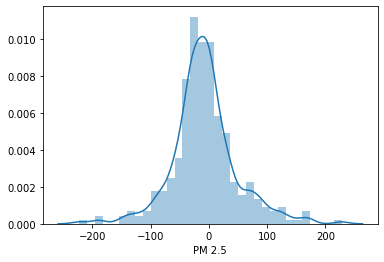

In [22]:
sns.distplot(y_test-prediction)

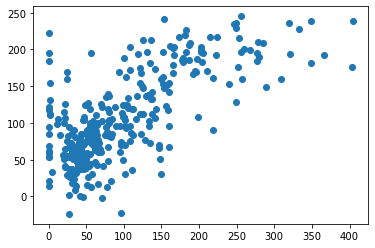

In [23]:
plt.scatter(y_test,prediction)

Above two diagram tells us that we have performed the LinearRegression on the dataset and the above diagram has a bell curve in other words,
the data forms a Gaussian Distribution (normally distributed)

We will focus on the Regression Evaluation Metrics later on, however these three common metrics helps
us to find error rates in the regression problems. 'MAE','MSE','RMSE'. All these are loss functions, because we want to minimize the number of errors.

In [24]:
from sklearn import metrics

In [25]:
print('MAE:', metrics.mean_absolute_error(y_test,prediction))
print('MSE:', metrics.mean_squared_error(y_test,prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE: 40.54246531132519
MSE: 3226.014432469144
RMSE: 56.798014335618674


FYI: Conerting into a pickle file. Converting to pickle file will help me predict while deploying the modal. 
pickle is like a blackbox, where you give the input and you get the output. it is a file format. You cant read the file. 


In [26]:
#please read all the below comments before running this cell
import pickle
#create a file in your local machine where you want to store this files data
file = open('../pickle-files/linear_regression_modal.pkl','wb')

#If you want to save the file in the google colab, run the below line
#file = open('linear_regression_modal.pkl','wb')

# dump information
pickle.dump(regressor, file)